### Import the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, silhouette_score

### Load the required dataset

In [2]:
df = pd.read_csv("../dataset/soil.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Normalize the dataset

In [3]:
X = df.iloc[:, :-1].values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

### Apply clustering algorithm (Gaussian Mixture Model)

In [4]:
cluster = GaussianMixture(n_components=7, random_state=42)
clusters = cluster.fit_predict(X_normalized)
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Visualize the clusters

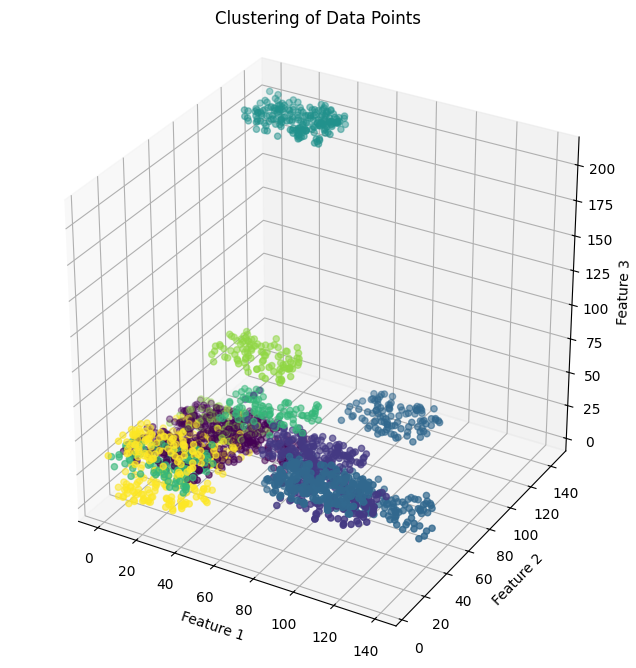

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1]) 
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Clustering of Data Points')
plt.show()

### Evaluate the model

In [6]:
silhouette = silhouette_score(X_normalized, clusters)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3260257558327337


### Create new dataset with cluster labels

In [7]:
new_dataset = pd.concat([df, pd.DataFrame(clusters, columns=['cluster'])], axis=1)
new_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


##

### Apply classification algorithm (Random Forest Classifier)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, clusters, test_size=0.3, random_state=0)
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Evaluate the model

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9878787878787879


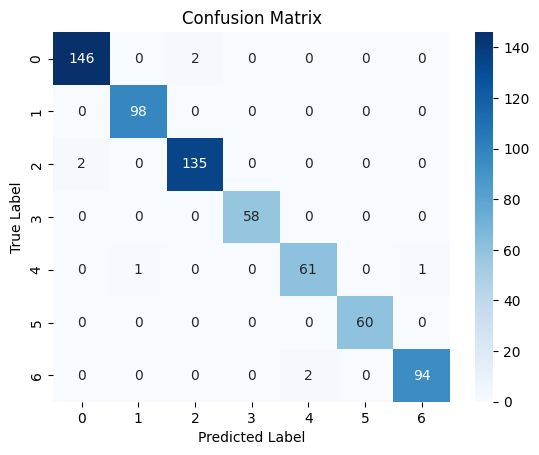

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Predict the test dataset

In [11]:
sample = classifier.predict(scaler.transform([[16,75,21,18,23,5,87]]))
crops = new_dataset.loc[new_dataset['cluster'] == sample[0], 'label'].values
print("The recommended crops are:", set(crops))

The recommended crops are: {'chickpea', 'kidneybeans'}
